In [1]:
# From previous angular_loss we can find the angular error (alpha_e) at 1 lens to generate 0.1dB loss
# This alpha_e can be correspondingly transformed into 3 reslutions required by an actuator:
# - lateral resolution (dx): the lateral movement that corresponds to this alpha_e by small angle analysis (bending tube)
# - voltage resolution (Vx): to generate this lateral reolution we need Vx = 2 *(abs(max_voltage)/scan_range) for each tube
# - bit resolution: assuming DAC has a step size of dx, then this is the least number of bits required to cover full scan range 



import sys
sys.path.append('..') 

import importlib
import modified_matrix_tracer
importlib.reload(modified_matrix_tracer)

from modified_matrix_tracer import GaussianBeam, FreeSpaceIterator, ThinLens, Misalignment
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from cycler import cycler
import numpy as np
import operator
from math import log, ceil, floor


In [2]:
#find bit resolution in the nearest ceiling power
# Number of steps = scan range/lateral deviation
# bit resolution = next_ceil_power2(Number of steps)

def next_ceil_power2_new(num):

    ceil_power = ceil(np.log2(num))
    return ceil_power



In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [4]:

#6 Types of Tube specifications
# Each type has correspondingly a tube length, scan range, max voltage by its index
# https://www.piezodrive.com/actuators/piezoelectric-tube-scanners/
L_tube_vec = [10.00*1e-3, 20.00*1e-3, 35.00*1e-3, 50.8*1e-3, 55*1e-3, 60*1e-3]

scan_range_vec = [3.8*1e-6, 15*1e-6, 39*1e-6, 52*1e-6, 66*1e-6, 114*1e-6]

max_voltage_vec = [264, 264, 264, 264, 250, 260]


#working range
wavelength_vec = [1465*1e-9, 1550*1e-9, 1648*1e-9]

#tilt angle to reach 0.1dB loss for each of the 3 wavelength, respectively 
alpha_t_deg_vec = [2.34*1e-3, 2.44*1e-3, 2.57*1e-3] #deg
alpha_t_rad_vec = [np.radians(x) for x in alpha_t_deg_vec]



In [5]:


delta_x_allwavelength = {}
voltage_res_allwavelength = {}
bit_res_allwavelength = {}
legend_label_all_wavelength = {}

for wavelength, alpha_t_rad in zip(wavelength_vec, alpha_t_rad_vec):
    
    #angle if approximate tube length as arc
    vartheta = 2*alpha_t_rad
    
    #actuator lateral movement resolution
    delta_x_vec = []
    
    #voltage to control this lateral movement resolution
    voltage_res_vec = []
    
    #bit resolution
    bit_res_vec  = []
    
    for L_tube, scan_range, max_voltage in zip(L_tube_vec,scan_range_vec, max_voltage_vec) :
        
        #outer radius assuming Length of tube is the arc
        mathcal_R = L_tube/vartheta;
        #lateral movement
        delta_x = mathcal_R*(1 - np.cos(vartheta))
   
        #voltage resolution
        Vx_res = 2*delta_x*max_voltage/scan_range
    
    
        #bit resolution
        #bit_res = next_ceil_power2(scan_range/delta_x)
        bit_res = next_ceil_power2_new(scan_range/delta_x)
    
        delta_x_vec.append(delta_x)
        voltage_res_vec.append(Vx_res)
        bit_res_vec.append(bit_res)
    
    
    delta_x_allwavelength[wavelength] = delta_x_vec
    voltage_res_allwavelength[wavelength] = voltage_res_vec
    bit_res_allwavelength[wavelength] = bit_res_vec
    
    
    #legend_label = "{:.1f} nm, {}*1e3 deg".format(wavelength*1e9, np.degrees(alpha_t_rad)*1e3)
    legend_label = r'{:.1f} nm, $\alpha_e$ = {}*1e-3 deg'.format(wavelength*1e9, np.degrees(alpha_t_rad)*1e3)
    legend_label_all_wavelength[wavelength] = legend_label
    
    #plt.plot([x*1e3 for x in L_tube_vec], [x*1e6 for x in delta_x_vec], label = legend_label, marker='o')
    #plt.plot([x*1e3 for x in L_tube_vec], voltage_res_vec, label = legend_label, marker='d')
    #plt.plot([x*1e3 for x in L_tube_vec], bit_res_vec, label = legend_label, marker='v')
    
    

        

---------------------------


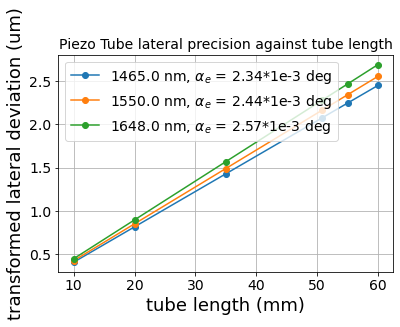

In [6]:

#plot lateral resolution 
plt.figure()

for wavelength in delta_x_allwavelength.keys():
    plt.plot([x*1e3 for x in L_tube_vec], [x*1e6 for x in delta_x_allwavelength[wavelength]], label = legend_label_all_wavelength[wavelength], marker='o')
plt.xlabel('tube length (mm)')
plt.ylabel('transformed lateral deviation (um)')
plt.title('Piezo Tube lateral precision against tube length')
plt.legend(loc="upper left")
plt.grid()
print('---------------------------')
plt.show() 
                
  


    
    
    


---------------------------


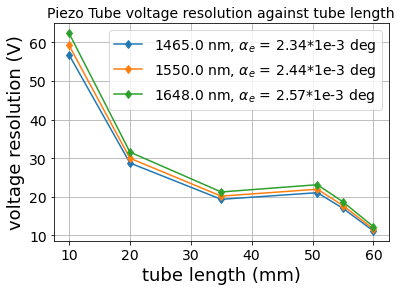

In [7]:
#plot voltage resolution

plt.figure()


for wavelength in voltage_res_allwavelength.keys():
    plt.plot([x*1e3 for x in L_tube_vec], voltage_res_allwavelength[wavelength], label = legend_label_all_wavelength[wavelength], marker='d')
plt.xlabel('tube length (mm)')
plt.ylabel('voltage resolution (V)')
plt.title('Piezo Tube voltage resolution against tube length')
plt.legend(loc="upper right")
plt.grid()
print('---------------------------')
plt.show()  
    

---------------------------


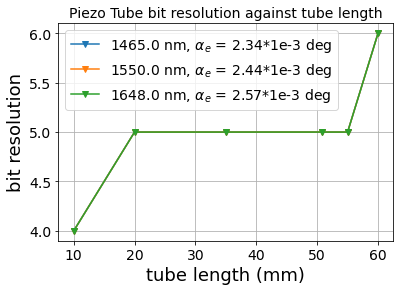

In [8]:
#plot bit resolution

plt.figure()


for wavelength in bit_res_allwavelength.keys():
    plt.plot([x*1e3 for x in L_tube_vec], bit_res_allwavelength[wavelength], label = legend_label_all_wavelength[wavelength], marker='v')
plt.xlabel('tube length (mm)')
plt.ylabel('bit resolution')
plt.title('Piezo Tube bit resolution against tube length')
plt.legend(loc="upper left")
plt.grid()
print('---------------------------')
plt.show()  










In [ ]:

def next_ceil_power2(num):
    i = 1
    while i < num: i *= 2
        
    ceil_power = np.log2(i)
    return ceil_power

